Reference: https://gist.github.com/bistaumanga/6023716

In [1]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class GM():
    
    def __init__(self, X, k):
        self.k = k
        self.X = X
        
        self.n_rows = X.shape[0]
        self.dims = X.shape[1]
        
        np.random.seed(666)
        self.mu = self.X[np.random.choice(self.n_rows, size=k, replace=False), :]
        self.sigma = [np.eye(self.dims)] * k
        self.coeff = [1/k] * k
        self.pi = np.zeros(shape=(self.n_rows, k))
        
        self.loss = [0]
        
    normal = lambda self, _m, _s: multivariate_normal(_m, _s).pdf(self.X)
    
    def e_step(self):
        
        pi = np.empty(shape=(self.k, self.n_rows))
                
        for k in range(self.k):
            pi[k] = self.coeff[k] * self.normal(self.mu[k], self.sigma[k])
                        
        fx = pi.sum(axis=0)
        self.loss.append(np.log(fx).sum())
                                
        self.pi = (pi / fx).T
        
    def m_step(self):
        
        # n_k
        n_k = self.pi.sum(axis=0)
        
        for k in range(self.k):
            
            # mu
            self.mu[k] = (self.pi[:, k] * self.X.T).sum(axis=1).T / n_k[k]
            
            # sigma
            x_mu = self.X - self.mu[k]
            self.sigma[k] = np.dot(np.multiply(x_mu.T,  self.pi[:, k]), x_mu) / n_k[k]
            
            # mixture coefficient
            self.coeff[k] = n_k[k] / self.n_rows
        
    def fit_data(self, max_epochs=100):
        
        for epoch in range(max_epochs):
            
            p_loss = self.loss[-1]
            
            # e step
            self.e_step()
            
            # m step
            self.m_step()
            
            if abs(p_loss - self.loss[-1]) < 0.0001:
                print('Convergence at epoch {0}'.format(epoch))
                break
                
            
    def plot_loss(self):
        plt.plot(np.array(self.loss[1:]))
        plt.gca().invert_yaxis()
        plt.xlabel('Epochs')
        plt.ylabel('Log Likelihood')
        plt.title('Log Likelihood vs Epochs')

# 2 gaussians

In [3]:
dp = np.loadtxt('../data/GM/2gaussian.txt')

In [4]:
gm = GM(dp, 2)

In [5]:
gm.fit_data()

Convergence at epoch 33


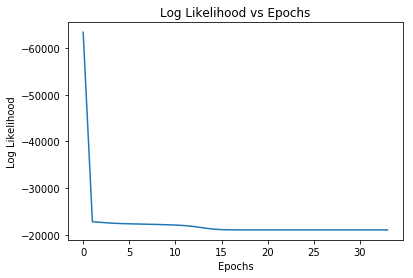

In [6]:
gm.plot_loss()

In [7]:
gm.mu

array([[ 7.01321406,  3.98317175],
       [ 2.99425844,  3.05208155]])

In [8]:
gm.sigma

[array([[ 0.97464436,  0.49740528],
        [ 0.49740528,  1.00108766]]), array([[ 1.01044351,  0.0271686 ],
        [ 0.0271686 ,  2.93772465]])]

In [9]:
gm.pi.sum(axis=0)

array([ 3991.09682097,  2008.90317903])

# 3 gaussians

In [10]:
dp3 = np.loadtxt('../data/GM/3gaussian.txt')

In [11]:
gm3 = GM(dp3, 3)

In [12]:
gm3.fit_data()

Convergence at epoch 41


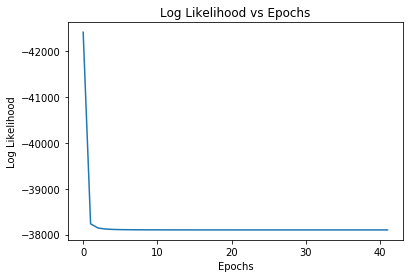

In [13]:
gm3.plot_loss()

In [14]:
gm3.mu

array([[ 3.03925178,  3.04723555],
       [ 5.01150714,  7.0012754 ],
       [ 7.02146826,  4.01541031]])

In [15]:
gm.sigma

[array([[ 0.97464436,  0.49740528],
        [ 0.49740528,  1.00108766]]), array([[ 1.01044351,  0.0271686 ],
        [ 0.0271686 ,  2.93772465]])]

In [16]:
gm.coeff

[0.66518280349423864, 0.33481719650576131]